In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


We first generate the data that we will try to predict. We use odeint for to simulate the differential equation $$x''(t) = -2x'(t)-x(t)+a(t).$$ We use a forcing function of $cos(2t)$ for 10 time units with 100,000 time points.

In [2]:
def action(t):
    return np.cos(2*t)

def dX_dt(X,t):
    return [X[1], -2*X[1]-2*X[0] + action(t)]

X0 = [0,0]
TimePoints = 100000
EndTime = 10
ts = np.linspace(0,EndTime,TimePoints)
Xs = odeint(dX_dt, X0, ts)
position = Xs[:,0]
acceleration = Xs[:,1]

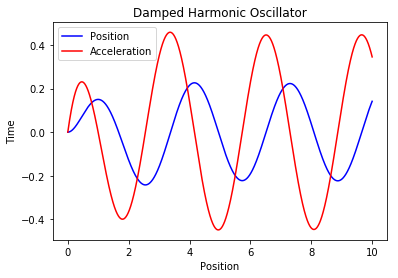

In [3]:
fig, ax = plt.subplots()
ax.plot(ts,position,'b',label='Position')
ax.plot(ts,acceleration,'r',label='Acceleration')
ax.legend()
plt.xlabel("Position")
plt.ylabel("Time")
plt.title("Damped Harmonic Oscillator")
plt.show()


Now import all the packages from Keras. This will be using TensorFlow as a backend. 

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import SimpleRNN
from keras.layers import RNN
from keras.utils import np_utils


/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Since the ODE is a sequence of data, our first guess of how to fit might be to use an RNN. An RNN takes the state at the previous time step and uses it for the next prediction. The following is an application of an RNN.

In [39]:
DataToLearn = []
for i in range(len(ts)-1):
    Input = np.append(Xs[i,:], [action(ts[i])])
    DataToLearn.append([Input])
                       
Xin = np.reshape(DataToLearn,(len(DataToLearn),1,3))
Xout = Xs[1:,:]


In [40]:
model = Sequential()
model.add(SimpleRNN(units = 2, input_shape=(Xin.shape[1], Xin.shape[2]), activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(Xin, Xout, epochs=200, batch_size=1000)
model.save_weights("OscillatorRNN.hdf5")


Epoch 1/200
99999/99999 [==============================] - 0s 4us/step - loss: 0.0868
Epoch 2/200
99999/99999 [==============================] - 0s 1us/step - loss: 0.0494
Epoch 3/200
99999/99999 [==============================] - 0s 1us/step - loss: 0.0295
Epoch 4/200
99999/99999 [==============================] - 0s 1us/step - loss: 0.0192
Epoch 5/200
99999/99999 [==============================] - 0s 1us/step - loss: 0.0136
Epoch 6/200
99999/99999 [==============================] - 0s 1us/step - loss: 0.0102
Epoch 7/200
99999/99999 [==============================] - 0s 1us/step - loss: 0.0079
Epoch 8/200
99999/99999 [==============================] - 0s 1us/step - loss: 0.0063
Epoch 9/200
99999/99999 [==============================] - 0s 1us/step - loss: 0.0051
Epoch 10/200
99999/99999 [==============================] - 0s 1us/step - loss: 0.0042
Epoch 11/200
99999/99999 [==============================] - 0s 1us/step - loss: 0.0036
Epoch 12/200
99999/99999 [==========================

99999/99999 [==============================] - 0s 1us/step - loss: 4.2112e-13
Epoch 93/200
99999/99999 [==============================] - 0s 1us/step - loss: 1.2690e-13
Epoch 94/200
99999/99999 [==============================] - 0s 1us/step - loss: 3.6917e-14
Epoch 95/200
99999/99999 [==============================] - 0s 1us/step - loss: 2.3558e-14
Epoch 96/200
99999/99999 [==============================] - 0s 1us/step - loss: 2.1345e-14
Epoch 97/200
99999/99999 [==============================] - 0s 1us/step - loss: 1.8985e-14
Epoch 98/200
99999/99999 [==============================] - 0s 1us/step - loss: 1.7016e-14
Epoch 99/200
99999/99999 [==============================] - 0s 1us/step - loss: 1.5732e-14
Epoch 100/200
99999/99999 [==============================] - 0s 1us/step - loss: 1.4060e-14
Epoch 101/200
99999/99999 [==============================] - 0s 1us/step - loss: 1.2656e-14
Epoch 102/200
99999/99999 [==============================] - 0s 1us/step - loss: 1.4038e-14
Epoch 103

99999/99999 [==============================] - 0s 1us/step - loss: 3.1009e-09
Epoch 182/200
99999/99999 [==============================] - 0s 1us/step - loss: 5.8794e-09
Epoch 183/200
99999/99999 [==============================] - 0s 1us/step - loss: 1.6086e-10
Epoch 184/200
99999/99999 [==============================] - 0s 1us/step - loss: 1.4591e-14
Epoch 185/200
99999/99999 [==============================] - 0s 1us/step - loss: 3.6839e-09
Epoch 186/200
99999/99999 [==============================] - 0s 1us/step - loss: 3.5376e-10
Epoch 187/200
99999/99999 [==============================] - 0s 1us/step - loss: 1.0430e-14
Epoch 188/200
99999/99999 [==============================] - 0s 1us/step - loss: 3.1594e-09
Epoch 189/200
99999/99999 [==============================] - 0s 1us/step - loss: 1.0066e-11
Epoch 190/200
99999/99999 [==============================] - 0s 1us/step - loss: 3.0306e-09
Epoch 191/200
99999/99999 [==============================] - 0s 1us/step - loss: 1.9557e-12
Ep

In [41]:
predictedOut = []
#Seed Predictions with initial point
x = np.reshape(np.append(Xs[0,:], [action(ts[0])]),(1,1,3))
pred = model.predict(x)


for i in range(len(ts)-1):
    pred = model.predict(x)
    predictedOut.append(pred)
    x = np.reshape(np.append(pred, [action(ts[i])]),(1,1,3))


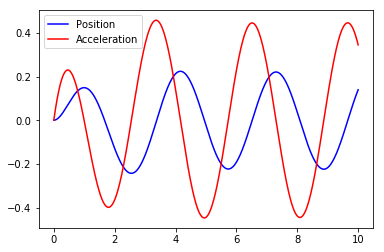

In [42]:
Predictions = np.reshape(predictedOut,(len(predictedOut),2))

fig, ax = plt.subplots()
ax.plot(ts[1:],Predictions[:,0],'b',label='Position')
ax.plot(ts[1:],Predictions[:,1],'r',label='Acceleration')
ax.legend()
plt.show()

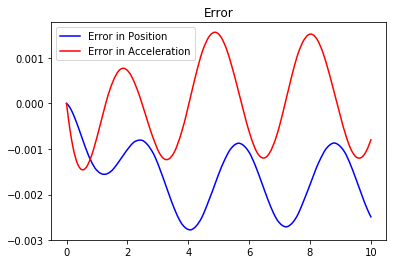

In [43]:
fig, ax = plt.subplots()
ax.plot(ts[1:],Predictions[:,0]-Xout[:,0],'b',label='Error in Position')
ax.plot(ts[1:],Predictions[:,1]-Xout[:,1],'r',label='Error in Acceleration')
ax.legend()
plt.title('Error')
plt.show()

The model here is a bit unpredictable and sometimes doesn't converge. But when it does, it fits relatively well. However, this model has redundancies, which could lead to instabilities. To predict the next state of the oscillator, I train on the previous while it also sees the hidden state from the previous cell, which is also trained to be the previous state. In other words, it sees the previous state twice. In fitting physical systems, it often makes more sense to use normal (non RNN) network. The following is an implementation of using a linear layer to predict the next state.

In [44]:
DataToLearn = []
for i in range(len(ts)-1):
    Input = np.append(Xs[i,:], [action(ts[i])])
    DataToLearn.append([Input])
                       
Xin = np.reshape(DataToLearn,(len(DataToLearn),3))
Xout = Xs[1:,:]

In [45]:
Xin = np.squeeze(Xin)
model = Sequential()
model.add(Dense(2, input_shape=(3,), activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(Xin, Xout, epochs=100, batch_size=1000)
model.save_weights("OscillatorDense.hdf5")

Epoch 1/100
99999/99999 [==============================] - 0s 3us/step - loss: 0.0432
Epoch 2/100
99999/99999 [==============================] - 0s 1us/step - loss: 0.0258
Epoch 3/100
99999/99999 [==============================] - 0s 1us/step - loss: 0.0166
Epoch 4/100
99999/99999 [==============================] - 0s 1us/step - loss: 0.0112
Epoch 5/100
99999/99999 [==============================] - 0s 1us/step - loss: 0.0075
Epoch 6/100
99999/99999 [==============================] - 0s 1us/step - loss: 0.0049
Epoch 7/100
99999/99999 [==============================] - 0s 1us/step - loss: 0.0031
Epoch 8/100
99999/99999 [==============================] - 0s 1us/step - loss: 0.0020
Epoch 9/100
99999/99999 [==============================] - 0s 1us/step - loss: 0.0012
Epoch 10/100
99999/99999 [==============================] - 0s 1us/step - loss: 7.1160e-04
Epoch 11/100
99999/99999 [==============================] - 0s 1us/step - loss: 4.2636e-04
Epoch 12/100
99999/99999 [==================

99999/99999 [==============================] - 0s 1us/step - loss: 9.0217e-15
Epoch 92/100
99999/99999 [==============================] - 0s 1us/step - loss: 8.7520e-15
Epoch 93/100
99999/99999 [==============================] - 0s 1us/step - loss: 7.6924e-15
Epoch 94/100
99999/99999 [==============================] - 0s 1us/step - loss: 7.5570e-15
Epoch 95/100
99999/99999 [==============================] - 0s 1us/step - loss: 6.5496e-15
Epoch 96/100
99999/99999 [==============================] - 0s 1us/step - loss: 5.7876e-15
Epoch 97/100
99999/99999 [==============================] - 0s 1us/step - loss: 5.8059e-15
Epoch 98/100
99999/99999 [==============================] - 0s 1us/step - loss: 5.8429e-15
Epoch 99/100
99999/99999 [==============================] - 0s 1us/step - loss: 5.1621e-15
Epoch 100/100
99999/99999 [==============================] - 0s 1us/step - loss: 5.7235e-15


In [46]:
predictedOut = []
x = np.reshape(np.append(Xs[0,:], [action(ts[0])]),(1,3))
pred = model.predict(x)


for i in range(len(ts)-1):
    pred = model.predict(x)
    predictedOut.append(pred)
    x = np.reshape(np.append(pred, [action(ts[i])]),(1,3))

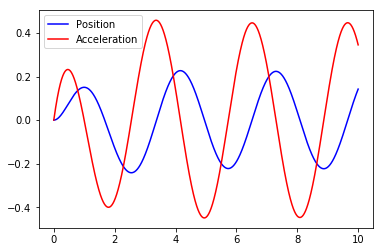

In [47]:
Predictions = np.reshape(predictedOut,(len(predictedOut),2))

fig, ax = plt.subplots()
ax.plot(ts[1:],Predictions[:,0],'b',label='Position')
ax.plot(ts[1:],Predictions[:,1],'r',label='Acceleration')
ax.legend()
plt.show()

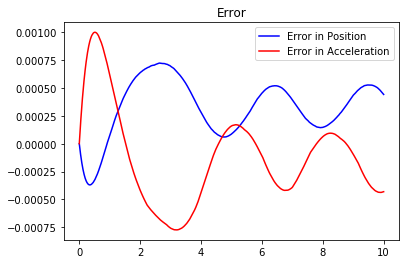

In [48]:
fig, ax = plt.subplots()
ax.plot(ts[1:],Predictions[:,0]-Xout[:,0],'b',label='Error in Position')
ax.plot(ts[1:],Predictions[:,1]-Xout[:,1],'r',label='Error in Acceleration')
ax.legend()
plt.title('Error')
plt.show()

Here we only trained for 100 epochs and we often have better convergence. Note, if I wanted to thoroughly test the predictive value of these trained models, I would use new data as validation. I'm reusing the training data because I'm just checking the fit. 